In [1]:
# Import necessary libraries
import pandas as pd

# Load datasets
train_data = pd.read_csv("titanic_train.csv.csv")
test_data = pd.read_csv("titanic_test.csv.csv")

# Display first few rows of the train dataset
print("Train Data:")
print(train_data.head())

# Display first few rows of the test dataset
print("\nTest Data:")
print(test_data.head())


Train Data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN  

In [2]:
# Check for missing values
print("Missing Values in Train Data:\n", train_data.isnull().sum())

print("\nMissing Values in Test Data:\n", test_data.isnull().sum())

# Get dataset info
print("\nTrain Data Info:")
print(train_data.info())

print("\nTest Data Info:")
print(test_data.info())

# Get summary statistics
print("\nSummary Statistics of Train Data:")
print(train_data.describe())


Missing Values in Train Data:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing Values in Test Data:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float

In [8]:
# Check if 'Cabin' column exists before dropping
if 'Cabin' in train_data.columns:
    train_data.drop(columns=['Cabin'], inplace=True)

if 'Cabin' in test_data.columns:
    test_data.drop(columns=['Cabin'], inplace=True)

# Fill missing 'Age' values with median age
train_data.loc[:, 'Age'] = train_data['Age'].fillna(train_data['Age'].median())
test_data.loc[:, 'Age'] = test_data['Age'].fillna(test_data['Age'].median())

# Fill missing 'Embarked' values with the most common value
if 'Embarked' in train_data.columns:
    train_data.loc[:, 'Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

# Fill missing 'Fare' value in test data with median fare
if 'Fare' in test_data.columns:
    test_data.loc[:, 'Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())

# Check if missing values are handled
print("Missing Values After Cleaning (Train Data):\n", train_data.isnull().sum())
print("\nMissing Values After Cleaning (Test Data):\n", test_data.isnull().sum())


Missing Values After Cleaning (Train Data):
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Missing Values After Cleaning (Test Data):
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [9]:
from sklearn.preprocessing import LabelEncoder

# Encode 'Sex' column (Male = 1, Female = 0)
label_encoder = LabelEncoder()
train_data.loc[:, 'Sex'] = label_encoder.fit_transform(train_data['Sex'])
test_data.loc[:, 'Sex'] = label_encoder.transform(test_data['Sex'])

# One-hot encode 'Embarked' column
train_data = pd.get_dummies(train_data, columns=['Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Embarked'], drop_first=True)

# Check if encoding is done
print(train_data.head())
print(test_data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris   1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   0  38.0      1      0   
2                             Heikkinen, Miss. Laina   0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   0  35.0      1      0   
4                           Allen, Mr. William Henry   1  35.0      0      0   

             Ticket     Fare  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500       False        True  
1          PC 17599  71.2833       False       False  
2  STON/O2. 3101282   7.9250       False        True  
3            113803  53.1000       False        True  
4            373450   8.050

In [10]:
from sklearn.model_selection import train_test_split

# Select features for the model
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']
X = train_data[features]  # Input features
y = train_data['Survived']  # Target variable

# Split data into training & validation sets (80% train, 20% test)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the datasets
print("Training Data Shape:", X_train.shape)
print("Validation Data Shape:", X_val.shape)


Training Data Shape: (712, 8)
Validation Data Shape: (179, 8)


In [12]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform validation data
X_val_scaled = scaler.transform(X_val)

# Train the model again with scaled data
model = LogisticRegression(max_iter=500)  # Increased max_iter
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_val_scaled)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Updated Model Accuracy: {accuracy:.4f}")


Updated Model Accuracy: 0.8101


In [13]:
# Apply the same scaling to the test data
X_test = test_data[features]
X_test_scaled = scaler.transform(X_test)

# Make predictions on test data
test_predictions = model.predict(X_test_scaled)

# Add predictions to the test dataset
test_data['Survived'] = test_predictions

# Save the results to a CSV file
test_data[['PassengerId', 'Survived']].to_csv('titanic_predictions.csv', index=False)

print("Predictions saved as 'titanic_predictions.csv'")


Predictions saved as 'titanic_predictions.csv'


C:\Users\dhanu\AppData\Local\Temp\ipykernel_7756\1337634673.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_data["Survived"], palette="coolwarm")


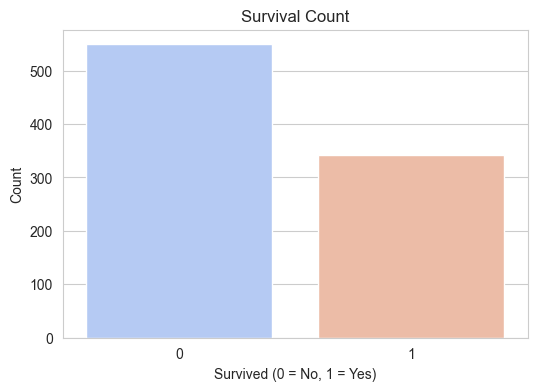

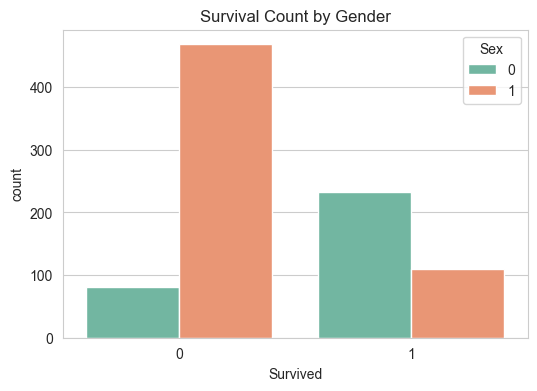

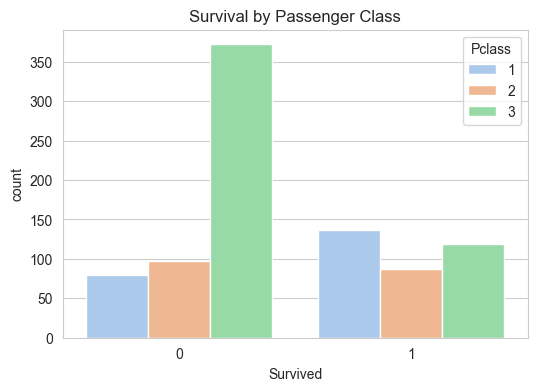

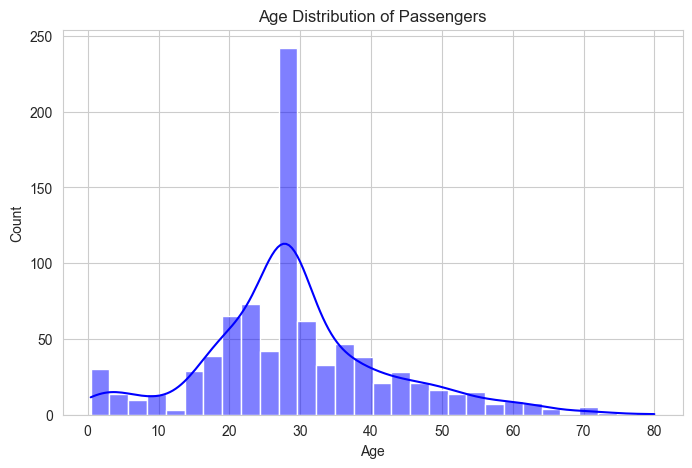

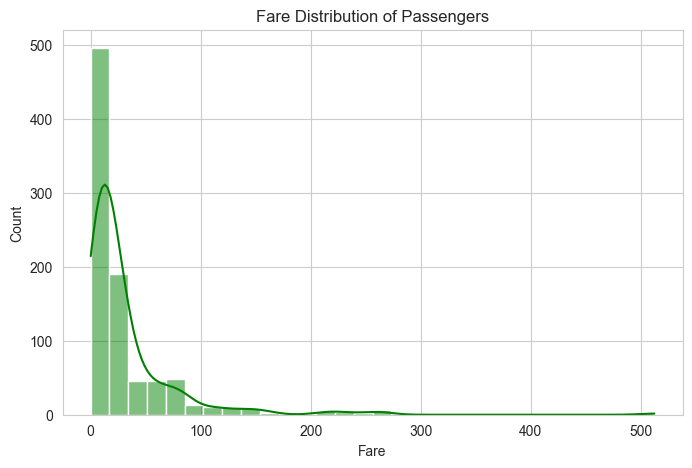

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# 1️⃣ Survival Count
plt.figure(figsize=(6,4))
sns.countplot(x=train_data["Survived"], palette="coolwarm")
plt.title("Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# 2️⃣ Survival by Gender
plt.figure(figsize=(6,4))
sns.countplot(x="Survived", hue="Sex", data=train_data, palette="Set2")
plt.title("Survival Count by Gender")
plt.show()

# 3️⃣ Survival by Passenger Class
plt.figure(figsize=(6,4))
sns.countplot(x="Survived", hue="Pclass", data=train_data, palette="pastel")
plt.title("Survival by Passenger Class")
plt.show()

# 4️⃣ Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(train_data["Age"].dropna(), kde=True, bins=30, color="blue")
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.show()

# 5️⃣ Fare Distribution
plt.figure(figsize=(8,5))
sns.histplot(train_data["Fare"], kde=True, bins=30, color="green")
plt.title("Fare Distribution of Passengers")
plt.xlabel("Fare")
plt.show()


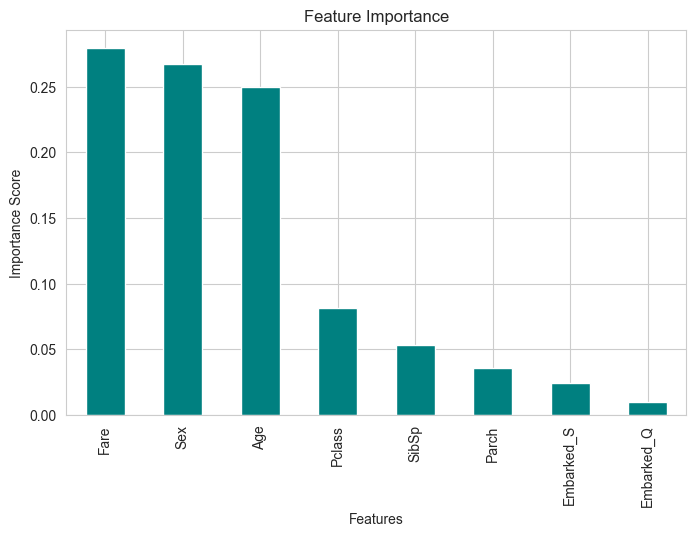

In [15]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)

# Plot feature importances
plt.figure(figsize=(8,5))
feature_importances.sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()


In [17]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = train_data.drop(columns=["Survived", "PassengerId"])
y = train_data["Survived"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train and test sets created successfully!")


Train and test sets created successfully!


In [21]:
# Drop unnecessary columns that were not used in training
X_train = train_data.drop(columns=["Survived", "Name", "Ticket"])
y_train = train_data["Survived"]

X_test = test_data.drop(columns=["Name", "Ticket"])


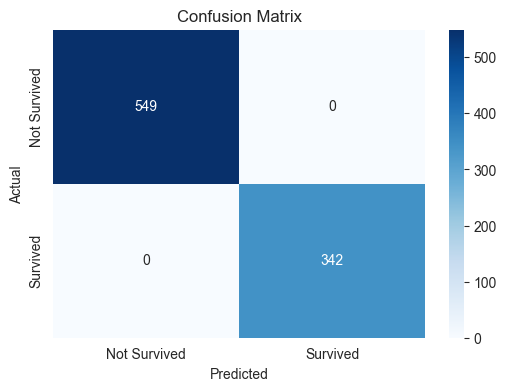

In [22]:
rf_model.fit(X_train, y_train)  # Retrain with the correct features
y_train_pred = rf_model.predict(X_train)  # Now predict correctly

# Generate the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)

# Display the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
